In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openbb import obb
import pyfinlib
import logging

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

# Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS', 'CL=F']


In [2]:
data = obb.equity.price.historical(symbol=tickers, start_date="2022-01-01", provider='yfinance')
data.results[0].date, data.results[-1].date

(datetime.date(2022, 1, 3), datetime.date(2025, 6, 20))

In [3]:
values = 200
portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset("AAPL", 1, [i.close for i in data.results if i.symbol == 'AAPL'][-values:]),
        pyfinlib.PortfolioAsset("META", 1, [i.close for i in data.results if i.symbol == 'META'][-values:]),
        pyfinlib.PortfolioAsset("C", 1, [i.close for i in data.results if i.symbol == 'C'][-values:]),
        pyfinlib.PortfolioAsset("DIS", 1, [i.close for i in data.results if i.symbol == 'DIS'][-values:]),
        pyfinlib.PortfolioAsset("CL=F", 1, [i.close for i in data.results if i.symbol == 'CL=F'][-values:]),
     ]
)

In [4]:
VaR_historical = portfolio.value_at_risk_pct(0.05)
VaR_historical_10 = portfolio.value_at_risk_pct(0.1)
VaR_historical_1 = portfolio.value_at_risk_pct(0.01)
VaR_historical_1, VaR_historical, VaR_historical_10

(-0.0368634725457046, -0.025768047969400184, -0.0198531181839001)

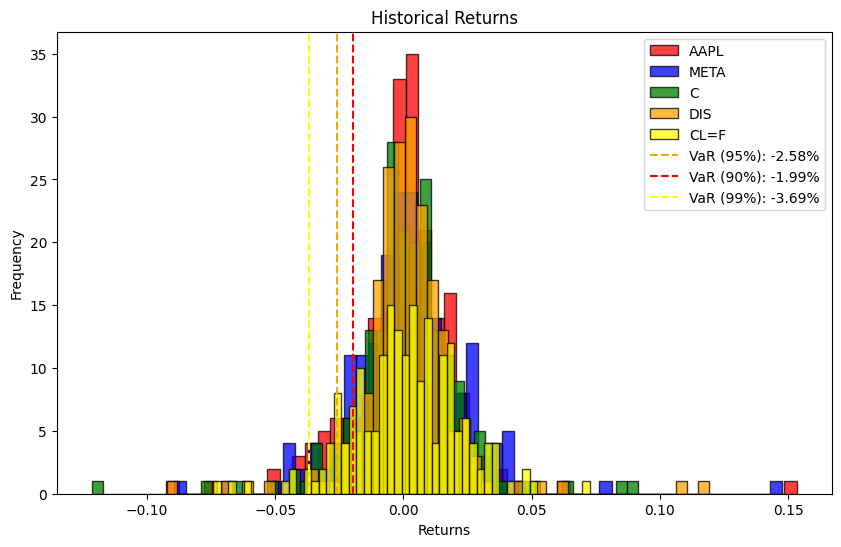

In [5]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'AAPL'][-values:]), bins=50, alpha=0.75, color='red', edgecolor='black', label='AAPL')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'META'][-values:]), bins=50, alpha=0.75, color='blue', edgecolor='black', label='META')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'C'][-values:]), bins=50, alpha=0.75, color='green', edgecolor='black', label='C')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'DIS'][-values:]), bins=50, alpha=0.75, color='orange', edgecolor='black', label='DIS')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'CL=F'][-values:]), bins=50, alpha=0.75, color='yellow', edgecolor='black', label='CL=F')
plt.axvline(VaR_historical, color='orange', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='red', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.axvline(VaR_historical_1, color='yellow', linestyle='--', label=f'VaR (99%): {VaR_historical_1:.2%}')
plt.title('Historical Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
value = portfolio.value_at_risk(0.05, 1_000_000.)
value

25768.0479694003

1 day VaR @ 95% confidence: 25768.0
2 day VaR @ 95% confidence: 36442.0
3 day VaR @ 95% confidence: 44632.0
4 day VaR @ 95% confidence: 51536.0
5 day VaR @ 95% confidence: 57619.0
6 day VaR @ 95% confidence: 63119.0
7 day VaR @ 95% confidence: 68176.0
8 day VaR @ 95% confidence: 72883.0
9 day VaR @ 95% confidence: 77304.0
10 day VaR @ 95% confidence: 81486.0
11 day VaR @ 95% confidence: 85463.0
12 day VaR @ 95% confidence: 89263.0
13 day VaR @ 95% confidence: 92908.0
14 day VaR @ 95% confidence: 96415.0
15 day VaR @ 95% confidence: 99799.0


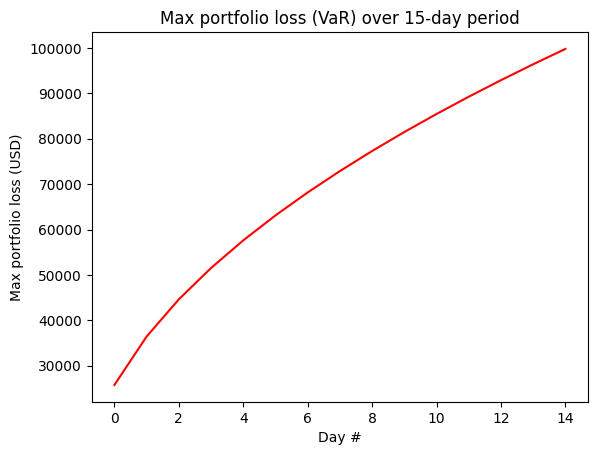

In [7]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(portfolio.value_at_risk_after_time(0.05, 1_000_000, x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(portfolio.value_at_risk_after_time(0.05, 1_000_000, x))))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title(f"Max portfolio loss (VaR) over {num_days}-day period")
plt.plot(var_array, "r")

1 day VaR @ 95% confidence: 25768.0
2 day VaR @ 95% confidence: 36442.0
3 day VaR @ 95% confidence: 44632.0
4 day VaR @ 95% confidence: 51536.0
5 day VaR @ 95% confidence: 57619.0
6 day VaR @ 95% confidence: 63119.0
7 day VaR @ 95% confidence: 68176.0
8 day VaR @ 95% confidence: 72883.0
9 day VaR @ 95% confidence: 77304.0
10 day VaR @ 95% confidence: 81486.0
11 day VaR @ 95% confidence: 85463.0
12 day VaR @ 95% confidence: 89263.0
13 day VaR @ 95% confidence: 92908.0
14 day VaR @ 95% confidence: 96415.0
15 day VaR @ 95% confidence: 99799.0


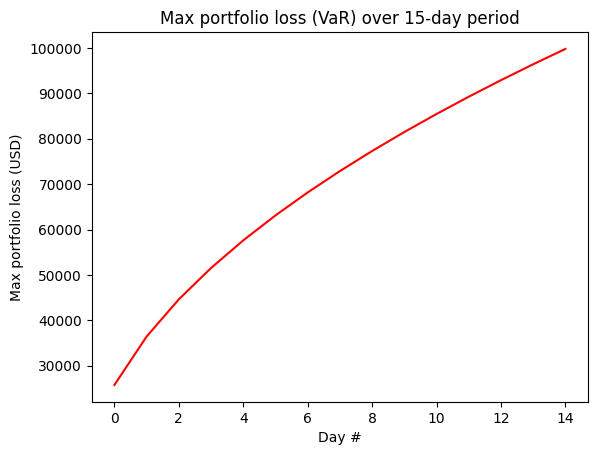

In [8]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x))))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title(f"Max portfolio loss (VaR) over {num_days}-day period")
plt.plot(var_array, "r")